<a href="https://colab.research.google.com/github/nagulapalliabhinay/CLV_PREDICTION/blob/main/CDNOW_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries

In [5]:
!pip install plydata
!pip install lifetimes

     |████████████████████████████████| 584 kB 6.6 MB/s 


In [7]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from zipfile import ZipFile
# !pip install plotly
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import plotnine as pn
import plydata.cat_tools as cat
# machine learning
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# Importing the lifetimes package
import lifetimes
from sklearn.metrics import mean_absolute_error

# Loading the Data

In [10]:
# Laoding the data into a dataframe.
CDNOW_DATA = pd.read_csv("/content/CDNOW_master.txt", sep='\s+')
CDNOW_DATA.shape

(69658, 4)

In [11]:
CDNOW_DATA.head() # Looking at the top 5 rows of the dataframe.

,00001,19970101,1,11.77
0,2,19970112,1,12.00
1,2,19970112,5,77.00
2,3,19970102,2,20.76
3,3,19970330,2,20.76
4,3,19970402,2,19.54


# Data Cleaning

In [12]:
CDNOW_DATA.info() # info() gives us the number of non null values and the data type of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69658 entries, 0 to 69657
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   00001     69658 non-null  int64  
 1   19970101  69658 non-null  int64  
 2   1         69658 non-null  int64  
 3   11.77     69658 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [13]:
CDNOW_DATA.columns = ["CustomerID", "TransactionDate", "UnitsSold", "Price"] # Assigning the column names to the data frame.

In [14]:
CDNOW_DATA["CustomerID"] = CDNOW_DATA["CustomerID"].astype(str) # changing the datatype of the CustomerID to string.

In [15]:
# changing the datatye of the TransactionDate column to datetime.
CDNOW_DATA['TransactionDate'] = CDNOW_DATA['TransactionDate'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [16]:
CDNOW_DATA.head()  # Looking at the top 5 rows of the dataframe.

,CustomerID,TransactionDate,UnitsSold,Price
0,2,1997-01-12,1,12.00
1,2,1997-01-12,5,77.00
2,3,1997-01-02,2,20.76
3,3,1997-03-30,2,20.76
4,3,1997-04-02,2,19.54


# Descriptive Analytics

In [17]:
CDNOW_DATA.describe() # looking at the min, max, mean, standard deviation and quartile values of the numerical values.

,UnitsSold,Price
count,69658.000000,69658.000000
mean,2.410061,35.893994
std,2.333934,36.282088
min,1.000000,0.000000
25%,1.000000,14.490000
50%,2.000000,25.980000
75%,3.000000,43.700000
max,99.000000,1286.010000


In [18]:
# First Transaction Date
CDNOW_DATA["TransactionDate"].min()

Timestamp('1997-01-01 00:00:00')

In [19]:
# Last Transaction Date
CDNOW_DATA["TransactionDate"].max()

Timestamp('1998-06-30 00:00:00')

In [20]:
# NUmber of Unique Customers
CDNOW_DATA["CustomerID"].nunique()

23569

In [21]:
# Total Revenue.
CDNOW_DATA["Price"].sum()

2500303.8600000003

### Customers with highest number of Transactions

In [22]:
# Grouping the data to create a dataframe with CustomerID and number of transactions that customer made.
NO_OF_TRANSACTIONS = CDNOW_DATA.groupby("CustomerID")["UnitsSold"].count() \
                                        .reset_index().sort_values("UnitsSold", ascending = False) \
                                        .rename(columns = {"UnitsSold" : "NO_OF_TRANSACTIONS"}) \
                                        .reset_index(drop = True) 


TOP_10_HIGHEST_TRANSACTIONS = NO_OF_TRANSACTIONS.iloc[:10, :2] # slicing to get just the 10 rows worth of data.
TOP_10_HIGHEST_TRANSACTIONS["CustomerID"] = TOP_10_HIGHEST_TRANSACTIONS["CustomerID"].astype("str")
TOP_10_HIGHEST_TRANSACTIONS.shape

(10, 2)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


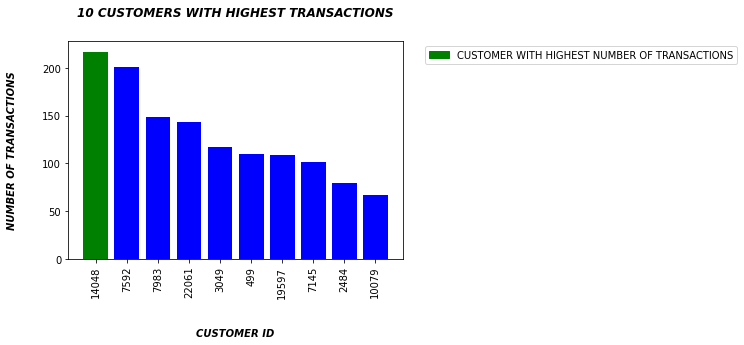

In [23]:
# plt.bar() function is used for plotting the bar plot.
# plt.ylabel() function is used for labelling the Y-axis.
# plt.xlabel() function is used for labelling the X-axis.
# plt.title() function is used for setting the title for the plot.
# plt.legend() function is used for setting the legend for the plot
# plt.show() function is used for displaying the plot.

        
#declaring the legend for the plot.
colors = {'CUSTOMER WITH HIGHEST NUMBER OF TRANSACTIONS':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1))

clrs1=[]
# declaring the colors of the bar plot's bars.
for i in TOP_10_HIGHEST_TRANSACTIONS['NO_OF_TRANSACTIONS']:
    if(i==max(TOP_10_HIGHEST_TRANSACTIONS['NO_OF_TRANSACTIONS'])):
        clrs1.append('green')
    else:
        clrs1.append('blue')
        

#Plot
bar_plot=plt.bar(TOP_10_HIGHEST_TRANSACTIONS['CustomerID'], TOP_10_HIGHEST_TRANSACTIONS['NO_OF_TRANSACTIONS'], color=clrs1)
plt.title('10 CUSTOMERS WITH HIGHEST TRANSACTIONS', pad =25,fontweight='bold', fontname="Times New Roman", style='italic')
plt.ylabel('NUMBER OF TRANSACTIONS', fontweight='bold', color = 'Black', verticalalignment='center', labelpad=30, fontname="Times New Roman", style='italic') # ylabel function is used for labelling the Y-axis.
plt.xlabel('CUSTOMER ID',fontweight='bold', color = 'Black', horizontalalignment='center', labelpad=30, fontname="Times New Roman", style='italic') # xlabel function is used for labelling the X-axis.
plt.xticks(rotation='vertical')


plt.show()

In [24]:
MONTHLY_INCOME = pd.DataFrame(CDNOW_DATA.set_index('TransactionDate')["Price"].resample("M").sum())
MONTHLY_INCOME.head()

,Price
TransactionDate,
1997-01-31,299048.40
1997-02-28,379590.03
1997-03-31,393155.27
1997-04-30,142824.49
1997-05-31,107933.30


In [25]:
# Plotting the bar plot of Transaction_data and Price.

fig = go.Figure([go.Scatter(x=MONTHLY_INCOME.index, y=MONTHLY_INCOME['Price'])])
fig.update_layout(
    title="MONTHLY INCOME",
    xaxis_title="DATE",
    yaxis_title="INCOME",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ),
)
fig.show()
# Reference:
# https://plotly.com/python/time-series/
# https://plotly.com/python/reference/layout/

### Cohort Analysis

In [26]:
# Customers first transaction. Considering the first transaction of the customers as a subset to perfrom our analysis.
CDNOW_FIRST_TRANSACTION = CDNOW_DATA.sort_values(["CustomerID", "TransactionDate"]) \
                               .groupby("CustomerID").first()
CDNOW_FIRST_TRANSACTION.shape

(23569, 3)

In [27]:
# first new customer.
CDNOW_FIRST_TRANSACTION["TransactionDate"].min()

Timestamp('1997-01-01 00:00:00')

In [28]:
# last new customer
CDNOW_FIRST_TRANSACTION["TransactionDate"].max()

Timestamp('1997-03-25 00:00:00')

In [29]:
# GETTING THE UNIQUE CUSTOMERS ID's
IDs = CDNOW_DATA['CustomerID'].unique()
IDs_SAMPLE = IDs[0:10]

In [30]:
# Creating a subset of the dataset with ten unique customer IDs
CDNOW_SUBSET = CDNOW_DATA[CDNOW_DATA['CustomerID'].isin(IDs_SAMPLE)].groupby(['CustomerID', 'TransactionDate']).sum().reset_index()
CDNOW_SUBSET.head()

,CustomerID,TransactionDate,UnitsSold,Price
0,10,1997-01-21,3,39.31
1,11,1997-01-01,1,13.49
2,11,1997-01-28,1,19.30
3,11,1997-03-17,1,12.77
4,11,1998-02-20,1,12.99


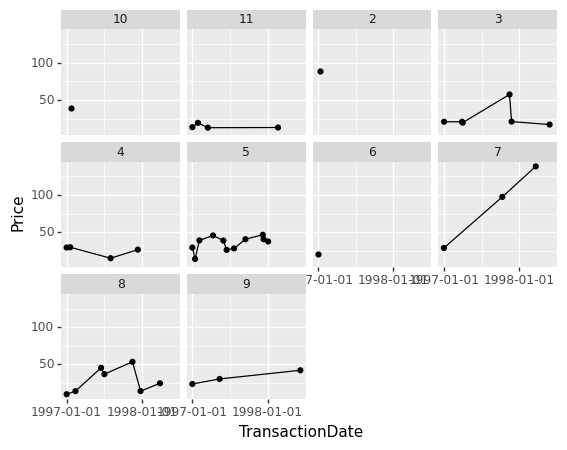

<ggplot: (8738775751685)>

In [31]:
# Frequency plot of the ten unique customers, with the price and date of each transaction.
pn.ggplot(pn.aes('TransactionDate', 'Price', group = 'CustomerID'), data = CDNOW_SUBSET) + pn.geom_line() +pn.geom_point() +pn.facet_wrap('CustomerID') +pn.scale_x_date(date_breaks = '1 year', date_lables = '%Y')

# Customer Segmentation <br> <i> RFM analysis</i>

### Recency

In [32]:
# MOST RECENT TRANSACTIONS OF THE CUSTOMERS 
# RFM ("R": Recency)

CDNOW_Recency = CDNOW_DATA.groupby('CustomerID', as_index=False)['TransactionDate'].max()
CDNOW_Recency.columns = ['CustomerID', 'LAST_TransactionDate']
RECENT_TransactionDate = CDNOW_Recency['LAST_TransactionDate'].max()
CDNOW_Recency['Recency'] = CDNOW_Recency['LAST_TransactionDate'].apply(lambda x: (RECENT_TransactionDate - x).days)
CDNOW_Recency.head()

,CustomerID,LAST_TransactionDate,Recency
0,10,1997-01-21,525
1,100,1998-04-20,71
2,1000,1997-01-20,526
3,10000,1997-07-31,334
4,10001,1997-10-09,264


In [33]:
CDNOW_Recency["Recency"].describe() # Gives the min, max and mean values of the Recency.

count    23569.000000
mean       367.214095
std        181.211321
min          0.000000
25%        207.000000
50%        471.000000
75%        505.000000
max        545.000000
Name: Recency, dtype: float64

### Frequency

In [34]:
# CALCULACTING THE Frequency OF THE CUSTOMERS
# RFM ("F": Frequency)

CDNOW_Frequency = CDNOW_DATA.drop_duplicates().groupby('CustomerID', as_index=False)['TransactionDate'].count()
CDNOW_Frequency.columns = ['CustomerID', 'Frequency']
CDNOW_Frequency.head()

,CustomerID,Frequency
0,10,1
1,100,3
2,1000,1
3,10000,3
4,10001,2


In [35]:
CDNOW_Frequency["Frequency"].describe() # Gives the min, max and mean values of the Frequency.

count    23569.000000
mean         2.944673
std          4.679375
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: Frequency, dtype: float64

### Monetary

In [36]:
# CALCULATING THE Monetary VALUE OF CUSTOMER SPEND ON PURCHASING CD's FROM THE CDNOW STORE.
# RFM ("M": Monetary)

CDNOW_Monetary = CDNOW_DATA.groupby('CustomerID', as_index=False)['Price'].sum()
CDNOW_Monetary.columns = ['CustomerID', 'Monetary']
CDNOW_Monetary.head()

,CustomerID,Monetary
0,10,39.31
1,100,55.24
2,1000,8.99
3,10000,77.42
4,10001,19.78


In [37]:
CDNOW_Monetary["Monetary"].describe() # Gives the min, max and mean values of the Monetary.

count    23569.000000
mean       106.084427
std        240.929523
min          0.000000
25%         19.970000
50%         43.410000
75%        106.490000
max      13990.930000
Name: Monetary, dtype: float64

### RFM

In [38]:
# MERGING Recency Frequency AND Monetary
CDNOW_RF = CDNOW_Recency.merge(CDNOW_Frequency, on='CustomerID')
CDNOW_RFM = CDNOW_RF.merge(CDNOW_Monetary, on='CustomerID').drop(columns='LAST_TransactionDate')
CDNOW_RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,10,525,1,39.31
1,100,71,3,55.24
2,1000,526,1,8.99
3,10000,334,3,77.42
4,10001,264,2,19.78


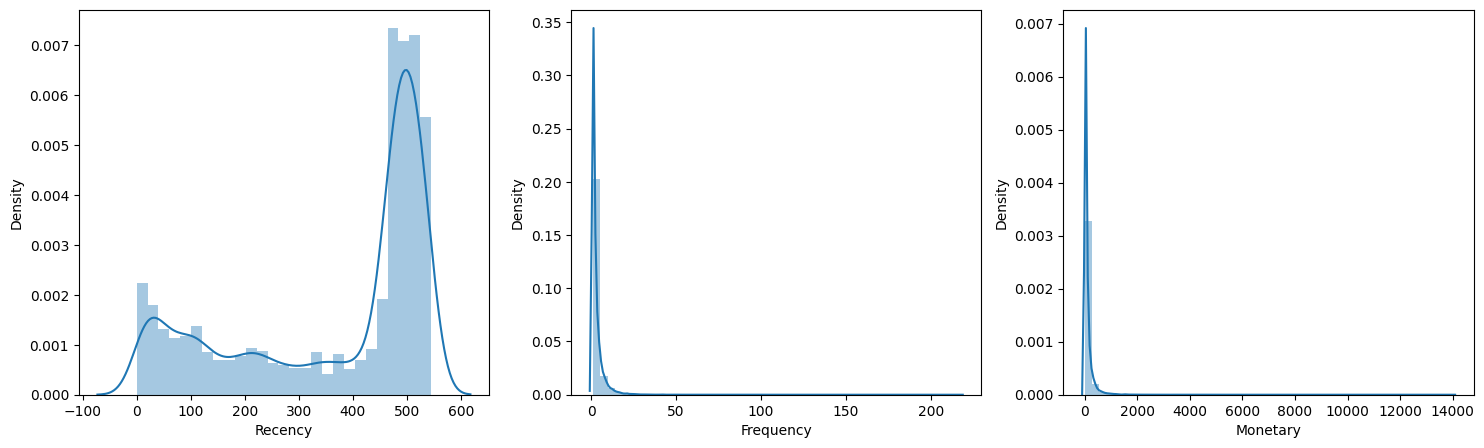

In [39]:
plt.rcParams.update(plt.rcParamsDefault)
fig, axes = plt.subplots(1,3, figsize=(18, 5))
sns.distplot(CDNOW_RFM["Recency"], ax = axes[0])
sns.distplot(CDNOW_RFM["Frequency"], ax = axes[1])
sns.distplot(CDNOW_RFM["Monetary"], ax = axes[2])
plt.show()

# From the plots below we can see that the data has skewness and we need to normalize the data.

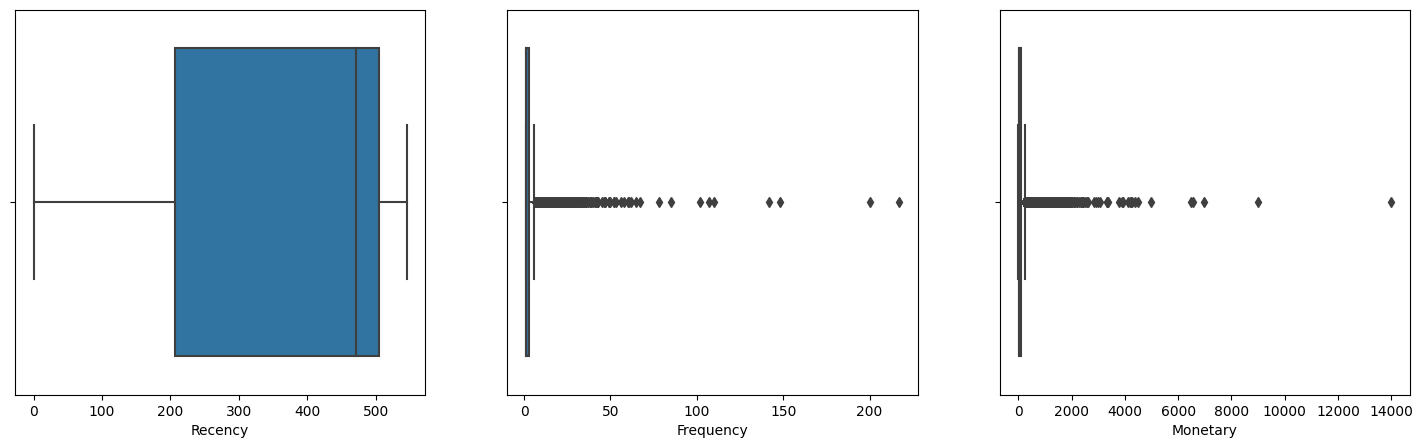

In [40]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
sns.boxplot(x = CDNOW_RFM["Recency"], ax = axes[0])
sns.boxplot(x = CDNOW_RFM["Frequency"], ax = axes[1])
sns.boxplot(x = CDNOW_RFM["Monetary"], ax = axes[2])
plt.show()
# From looking at the plot below we say that the data has some outliers.

### Robust Scaler

In [41]:
# Normalizing the data using Robust Scalar to deal with the coutliers.
scaler = RobustScaler()
scaler.fit(CDNOW_RFM[['Recency', 'Frequency', 'Monetary']])
CDNOW_RFM[['Recency_NORM', 'Frequency_NORM', 'Monetary_NORM']] = scaler.transform(CDNOW_RFM[['Recency', 'Frequency', 'Monetary']])

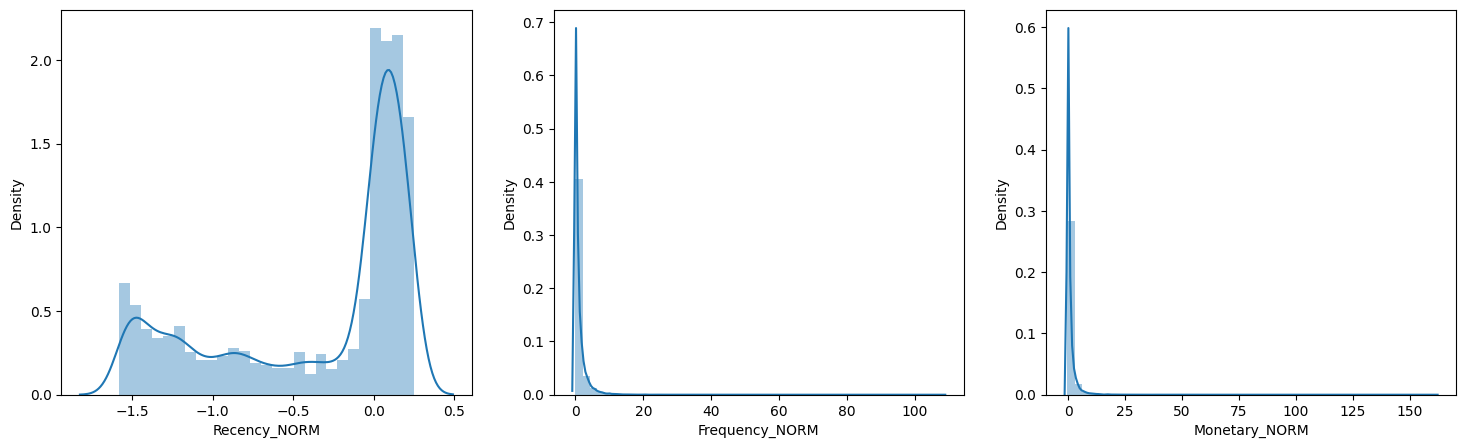

In [42]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
sns.distplot(CDNOW_RFM["Recency_NORM"], ax = axes[0])
sns.distplot(CDNOW_RFM["Frequency_NORM"], ax = axes[1])
sns.distplot(CDNOW_RFM["Monetary_NORM"], ax = axes[2])
plt.show()


### K-means for customer segmentation.

In [43]:
# Using the Unsupervised Learning to cluster the customers into segemets

cluster_range = range( 1, 10 )
cluster_errors = {"R_cluster_errors":[], "F_cluster_errors":[], "M_cluster_errors":[]}

# Identifing the optimal number of clusters using telbow curve.
for num_clusters in cluster_range:
    R_clusters = KMeans(num_clusters)
    F_clusters = KMeans(num_clusters)
    M_clusters = KMeans(num_clusters)
    R_clusters.fit(CDNOW_RFM[['Recency_NORM']])
    F_clusters.fit(CDNOW_RFM[['Frequency_NORM']])
    M_clusters.fit(CDNOW_RFM[['Monetary_NORM']])
    cluster_errors["R_cluster_errors"].append(R_clusters.inertia_)
    cluster_errors["F_cluster_errors"].append(F_clusters.inertia_)
    cluster_errors["M_cluster_errors"].append(M_clusters.inertia_)
    

In [44]:
# Creating a dataframe of the Cluster Errors to find the optimal Cluster threshold.
CLUSTER_ERRORS_DF = pd.DataFrame({"NO_OF_CLUSTERS":cluster_range, "R_CLUSTER_ERRORS": cluster_errors["R_cluster_errors"], 
                                  "F_CLUSTER_ERRORS": cluster_errors["F_cluster_errors"], 
                                 "M_CLUSTER_ERRORS": cluster_errors["M_cluster_errors"]})

In [45]:
CLUSTER_ERRORS_DF

,NO_OF_CLUSTERS,R_CLUSTER_ERRORS,F_CLUSTER_ERRORS,M_CLUSTER_ERRORS
0,1,8714.868831,129014.463427,182755.202026
1,2,1095.786749,71329.922732,102655.128268
2,3,456.995459,40456.159651,57743.128360
3,4,278.914022,23427.822121,36700.877723
4,5,195.215164,15439.631785,24395.509549
5,6,120.517277,11095.516848,17046.431594
6,7,90.349618,8286.983238,12576.299580
7,8,71.899290,5877.482001,8922.696488
8,9,59.021391,4656.129901,6641.089095


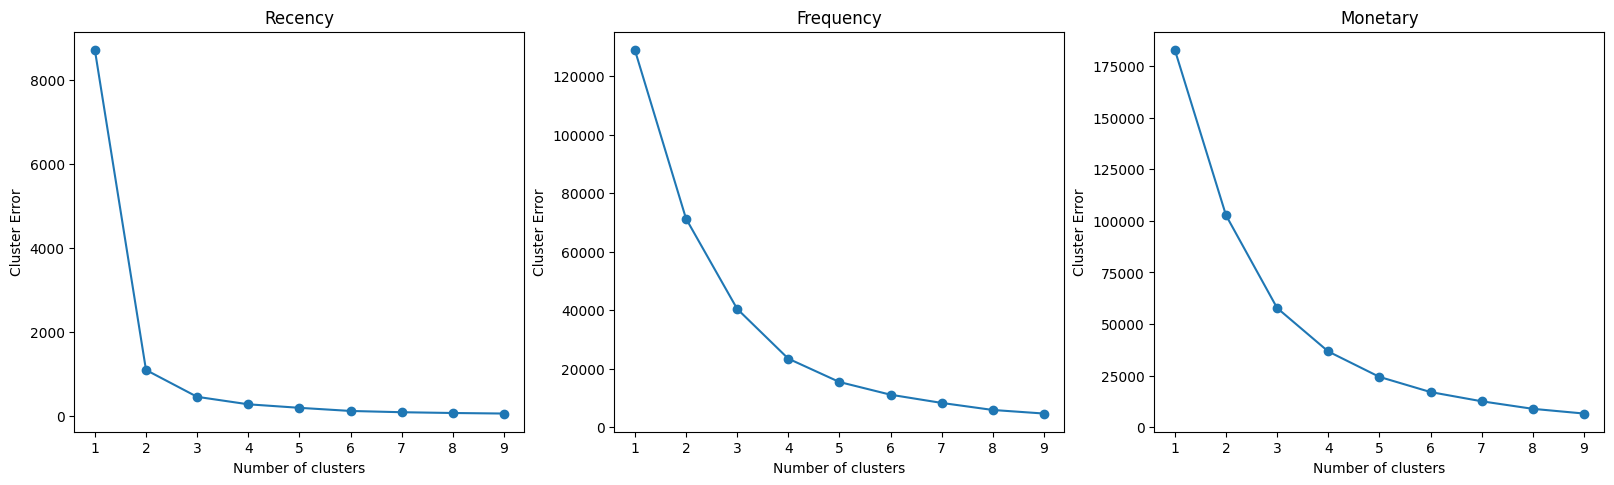

In [46]:
# plotting the line graph to picture the elbow curve and determine the optimal number of clusters.
plt.rcParams.update(plt.rcParamsDefault)
fig, axes = plt.subplots(1,3, figsize=(18, 5))
axes[0].plot( CLUSTER_ERRORS_DF.NO_OF_CLUSTERS, CLUSTER_ERRORS_DF.R_CLUSTER_ERRORS, marker = "o", axes = axes[0])
axes[0].set_title("Recency")
axes[0].set_xlabel("Number of clusters")
axes[0].set_ylabel("Cluster Error")
axes[1].plot( CLUSTER_ERRORS_DF.NO_OF_CLUSTERS, CLUSTER_ERRORS_DF.F_CLUSTER_ERRORS, marker = "o", axes = axes[1])
axes[1].set_title("Frequency")
axes[1].set_xlabel("Number of clusters")
axes[1].set_ylabel("Cluster Error")
axes[2].plot( CLUSTER_ERRORS_DF.NO_OF_CLUSTERS, CLUSTER_ERRORS_DF.M_CLUSTER_ERRORS, marker = "o", axes = axes[2])
axes[2].set_title("Monetary")
axes[2].set_xlabel("Number of clusters")
axes[2].set_ylabel("Cluster Error")
plt.subplots_adjust(left  = 0.05,
right = 0.9,
bottom = 0.1,
top = 0.9,
wspace = 0.2,
hspace = 1)
plt.show()

# From the Elbow Curves below:
# FOR Recency_NORM optimal clusters = 3
# FOR Frequency_NORM optimal clusters = 4
# FOR Monetary_NORM optimal clusters = 4

### K-means

In [47]:
# Creating the clusters.

R_clusters_Optimized = KMeans(3, random_state=42)
F_clusters_Optimized = KMeans(4, random_state=42)
M_clusters_Optimized = KMeans(4, random_state=42)

In [48]:
# fitting the data
R_clusters_Optimized.fit(CDNOW_RFM[['Recency_NORM']])
F_clusters_Optimized.fit(CDNOW_RFM[['Frequency_NORM']])
M_clusters_Optimized.fit(CDNOW_RFM[['Monetary_NORM']])

KMeans(n_clusters=4, random_state=42)

In [49]:
# Storing the output/labels of the datapoints.
CDNOW_RFM["R_CLUSTER"] = R_clusters_Optimized.labels_
CDNOW_RFM["F_CLUSTER"] = F_clusters_Optimized.labels_
CDNOW_RFM["M_CLUSTER"] = M_clusters_Optimized.labels_

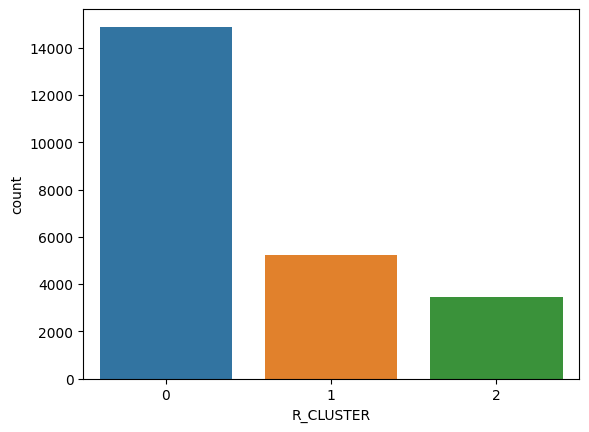

In [50]:
# Count plots to see the count of datapoints in each cluster.
sns.countplot(CDNOW_RFM["R_CLUSTER"])
plt.show()

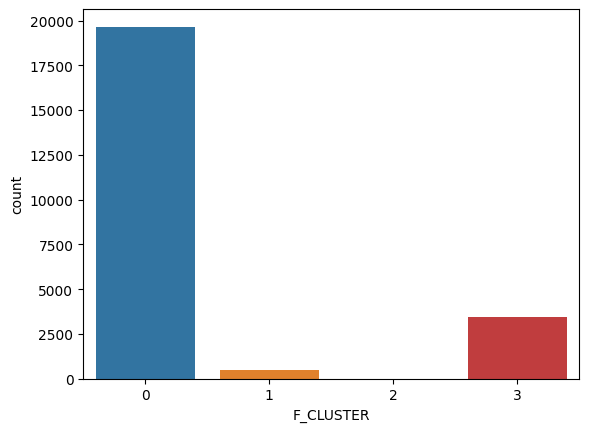

In [51]:
# Count plots to see the count of datapoints in each cluster.
sns.countplot(CDNOW_RFM["F_CLUSTER"])
plt.show()

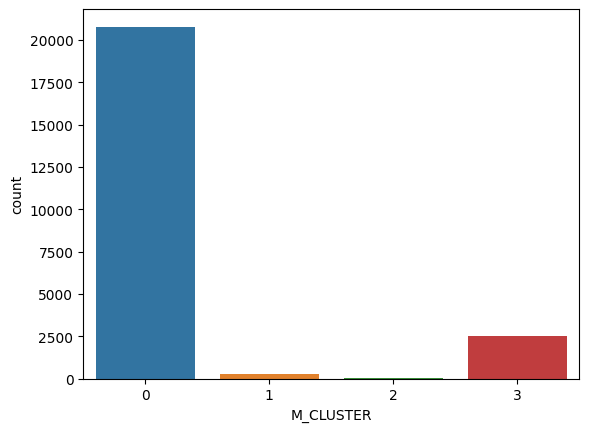

In [52]:
# Count plots to see the count of datapoints in each cluster.
sns.countplot(CDNOW_RFM["M_CLUSTER"])
plt.show()

In [53]:
CDNOW_RFM.head() # looking at the cluster values.

,CustomerID,Recency,Frequency,Monetary,Recency_NORM,Frequency_NORM,Monetary_NORM,R_CLUSTER,F_CLUSTER,M_CLUSTER
0,10,525,1,39.31,0.181208,0.0,-0.047388,0,0,0
1,100,71,3,55.24,-1.342282,1.0,0.136731,1,0,0
2,1000,526,1,8.99,0.184564,0.0,-0.397827,0,0,0
3,10000,334,3,77.42,-0.459732,1.0,0.393088,2,0,0
4,10001,264,2,19.78,-0.694631,0.5,-0.273116,2,0,0


In [54]:
# For a Customer to be a High-Value Customer, the customers:
# Recency should be low
# Frequency should be high
# Monetary Value should be high
CDNOW_RFM.sort_values('Recency_NORM', ascending = True, inplace = True)
CDNOW_RFM.sort_values('Frequency_NORM', ascending = False, inplace = True)
CDNOW_RFM.sort_values('Monetary_NORM', ascending = False, inplace = True)
CDNOW_RFM.head()

,CustomerID,Recency,Frequency,Monetary,Recency_NORM,Frequency_NORM,Monetary_NORM,R_CLUSTER,F_CLUSTER,M_CLUSTER
20895,7592,1,200,13990.93,-1.577181,99.5,161.205733,1,2,2
4499,14048,0,217,8976.33,-1.580537,108.0,103.246879,1,2,2
21329,7983,5,148,6973.07,-1.563758,73.5,80.093158,1,2,2
10377,19339,445,56,6552.70,-0.087248,27.5,75.234512,0,1,2
21272,7931,17,62,6497.18,-1.523490,30.5,74.592811,1,1,2


In [55]:
# Creating the final cluster using the independent clusters.
CDNOW_RFM["FinalCluster"] = CDNOW_RFM["R_CLUSTER"] + CDNOW_RFM["F_CLUSTER"] + CDNOW_RFM["M_CLUSTER"]
CDNOW_RFM.reset_index(inplace = True, drop = True)

In [56]:
CDNOW_RFM.head()

,CustomerID,Recency,Frequency,Monetary,Recency_NORM,Frequency_NORM,Monetary_NORM,R_CLUSTER,F_CLUSTER,M_CLUSTER,FinalCluster
0,7592,1,200,13990.93,-1.577181,99.5,161.205733,1,2,2,5
1,14048,0,217,8976.33,-1.580537,108.0,103.246879,1,2,2,5
2,7983,5,148,6973.07,-1.563758,73.5,80.093158,1,2,2,5
3,19339,445,56,6552.70,-0.087248,27.5,75.234512,0,1,2,3
4,7931,17,62,6497.18,-1.523490,30.5,74.592811,1,1,2,4


In [57]:
CDNOW_RFM.tail()

,CustomerID,Recency,Frequency,Monetary,Recency_NORM,Frequency_NORM,Monetary_NORM,R_CLUSTER,F_CLUSTER,M_CLUSTER,FinalCluster
23564,7005,519,1,0.0,0.161074,0.0,-0.501734,0,0,0,0
23565,10664,507,1,0.0,0.120805,0.0,-0.501734,0,0,0,0
23566,2556,535,1,0.0,0.214765,0.0,-0.501734,0,0,0,0
23567,908,542,1,0.0,0.238255,0.0,-0.501734,0,0,0,0
23568,22051,468,1,0.0,-0.010067,0.0,-0.501734,0,0,0,0


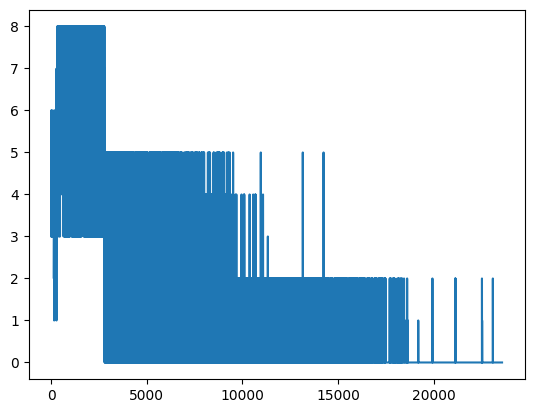

In [58]:
plt.plot(CDNOW_RFM.index, CDNOW_RFM["FinalCluster"])
plt.show()

In [59]:
# Naming the clusters.

CDNOW_RFM['Segment'] = 'Lost Customer'
CDNOW_RFM.loc[CDNOW_RFM['FinalCluster']==1,'Segment'] = 'Low-Value' 
CDNOW_RFM.loc[CDNOW_RFM['FinalCluster'] == 2,'Segment'] = 'Mid-Value'
CDNOW_RFM.loc[CDNOW_RFM['FinalCluster']>2,'Segment'] = 'High-Value'
CDNOW_RFM.loc[CDNOW_RFM['FinalCluster']>5,'Segment'] = 'Top Customer'

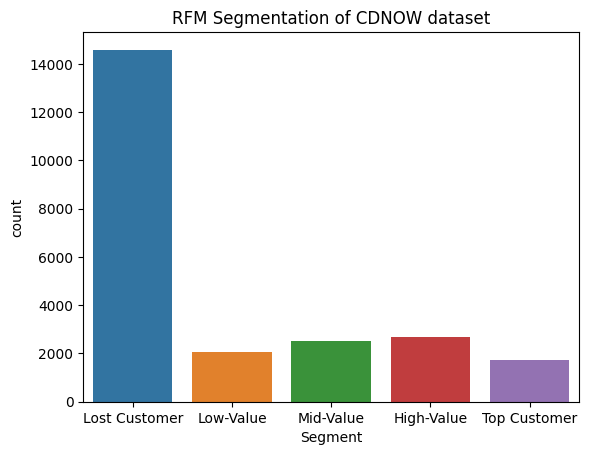

In [60]:
sns.countplot(CDNOW_RFM['Segment'], order= ['Lost Customer','Low-Value' ,'Mid-Value','High-Value','Top Customer'])
plt.title("RFM Segmentation of CDNOW dataset")
plt.show()

In [61]:
CDNOW_RFM.to_csv("CDNOW_CustomerSegmentation.csv", index = False)

# Machine Learning Modelling

### Feature Engineering

In [62]:
n_days = 90 # The no of days for which we want to predict CLV.
max_date = CDNOW_DATA['TransactionDate'].max() # Getting the max transaction date.
cutoff = max_date - pd.to_timedelta(n_days, unit = 'd') # Creating a cut off to exclude the last 90 days.

In [63]:
IN_DATA = CDNOW_DATA[CDNOW_DATA['TransactionDate'] <= cutoff] # Excluding the last 90 days.
OUT_DATA = CDNOW_DATA[CDNOW_DATA['TransactionDate'] > cutoff] # Just the last 90 days data.

In [64]:
# making targets from out data
TARGET_DATA = OUT_DATA.drop('UnitsSold', axis = 1).groupby('CustomerID').sum().rename({'Price':'spend_90_total'}, axis = 1).assign(spend_90_flag = 1)
TARGET_DATA.head()

,spend_90_total,spend_90_flag
CustomerID,,
100,28.98,1
10018,11.88,1
1002,15.48,1
10026,36.48,1
10027,122.33,1


In [65]:
# make recency (date) features from in data
max_date = IN_DATA['TransactionDate'].max()

In [66]:
# Getting the recency data to include that as feature for ML modelling
recency_features_df = IN_DATA[['CustomerID', 'TransactionDate']].groupby('CustomerID').apply(lambda x: (x['TransactionDate'].max() - max_date)/ pd.to_timedelta(1, 'day')).to_frame().set_axis(['recency'], axis = 1)
recency_features_df.head()

,recency
CustomerID,
10,-435.0
100,-111.0
1000,-436.0
10000,-244.0
10001,-174.0


In [67]:
# make frequency (count features from in data)
frequency_features_df = IN_DATA[['CustomerID', 'TransactionDate']].groupby('CustomerID').count().set_axis(['frequency'], axis = 1)
frequency_features_df.head()

,frequency
CustomerID,
10,1
100,2
1000,1
10000,3
10001,2


In [68]:
# make price (monitery features from in data)
price_features_df = IN_DATA.groupby('CustomerID').aggregate({'Price':['sum', 'mean']}).set_axis(['price_sum', 'price_mean'], axis = 1)
price_features_df.head()

,price_sum,price_mean
CustomerID,,
10,39.31,39.310000
100,26.26,13.130000
1000,8.99,8.990000
10000,77.42,25.806667
10001,19.78,9.890000


In [69]:
# combine features
features_df = pd.concat([recency_features_df, frequency_features_df, price_features_df], axis = 1).merge(TARGET_DATA, left_index = True, right_index = True, how = 'left').fillna(0)
features_df.head()

,recency,frequency,price_sum,price_mean,spend_90_total,spend_90_flag
CustomerID,,,,,,
10,-435.0,1,39.31,39.310000,0.00,0.0
100,-111.0,2,26.26,13.130000,28.98,1.0
1000,-436.0,1,8.99,8.990000,0.00,0.0
10000,-244.0,3,77.42,25.806667,0.00,0.0
10001,-174.0,2,19.78,9.890000,0.00,0.0


### Regression
> How much will the customers spend in the next 90 days?

### XGBOOST

In [70]:
X = features_df[['recency', 'frequency', 'price_sum', 'price_mean']]
# next 90 days spend prediction
y_spend = features_df['spend_90_total']

In [71]:
# Model
xgb_reg_spec = XGBRegressor(objective='reg:squarederror', random_state=123)

In [72]:
# Creating a GridSearchCV to tune the hyperparameters
xgb_reg_model =GridSearchCV(estimator=xgb_reg_spec, param_grid = dict(learning_rate = [0.01, 0.1, 0.3, 0.5]), scoring='neg_mean_absolute_error', cv = 5) 

In [73]:
# Fitting the Model
xgb_reg_model.fit(X, y_spend)

GridSearchCV(cv=5,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=123),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='neg_mean_absolute_error')

In [74]:
xgb_reg_model.best_score_ # NAE of the best parameters model.

-10.126913200606932

In [75]:
xgb_reg_model.best_params_ # best Hyperparameter value

{'learning_rate': 0.01}

In [76]:
predictions_xgb_reg_model = xgb_reg_model.predict(X) # Prediction

In [77]:
# Merging the predictions to the data.
XGB_PRED_DATA = pd.DataFrame({"prediction_xgb" : predictions_xgb_reg_model.tolist()}).merge(X.reset_index(),left_index=True, right_index=True)
XGB_PRED_DATA.head()

,prediction_xgb,CustomerID,recency,frequency,price_sum,price_mean
0,1.731680,10,-435.0,1,39.31,39.310000
1,5.593544,100,-111.0,2,26.26,13.130000
2,1.731680,1000,-436.0,1,8.99,8.990000
3,3.201852,10000,-244.0,3,77.42,25.806667
4,2.902765,10001,-174.0,2,19.78,9.890000


In [78]:
XGB_PRED_DATA.to_csv("XGB_reg_prediction.csv") # Writing the predictions to a csv

### Linear Regression

In [79]:
lr = LinearRegression() # Model

In [80]:
parameters = {'fit_intercept':[True,False],  'copy_X':[True, False]} # Hyper parameters.
lr_reg_model = GridSearchCV(lr,parameters, cv=5, scoring='neg_mean_absolute_error')
lr_reg_model.fit(X, y_spend)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [81]:
lr_reg_model.best_score_ # NAE of the best parameters model.

-11.220285179961735

In [82]:
lr_reg_model.best_params_ # best Hyperparameter value

{'copy_X': True, 'fit_intercept': True}

In [83]:
predictions_lr_reg_model = lr_reg_model.predict(X) # Prediction

In [84]:
# Merging the prediction to the X data.
LINEAR_REGRESSION_PRED_DATA = pd.DataFrame({"prediction_lr" : predictions_lr_reg_model.tolist()}).merge(X.reset_index(),left_index=True, right_index=True)

In [85]:
LINEAR_REGRESSION_PRED_DATA.to_csv("lr_reg_prediction.csv") # Predictions to CSV

# Random Forest Regression

In [86]:
# Hyper Parameters
param_grid = dict(n_estimators = [10, 20, 50, 100, 500, 1000], max_depth = [2, 5], max_features = ['auto', 'sqrt', 'log2'])

In [87]:
rf = RandomForestRegressor() # model
rf_regressor =GridSearchCV(estimator=rf, param_grid = param_grid, scoring='neg_mean_absolute_error', refit= True, cv = 5) 

In [88]:
rf_regressor.fit(X, y_spend) #fitting the data

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 500, 1000]},
             scoring='neg_mean_absolute_error')

In [89]:
rf_regressor.best_score_ # NAE of the best model.

-10.731232614304833

In [90]:
rf_regressor.best_params_ # Best hyper parameters.

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}

In [91]:
rf_regressor.best_estimator_

RandomForestRegressor(max_depth=5)

In [92]:
predictions_rf_reg_model = rf_regressor.predict(X) # Prediction

In [93]:
# Mergeing the prediction with X data
RF_REGRESSION_PRED_DATA = pd.DataFrame({"prediction_rf" : predictions_rf_reg_model.tolist()}).merge(X.reset_index(),left_index=True, right_index=True)

In [94]:
RF_REGRESSION_PRED_DATA.to_csv("rf_reg_prediction.csv") # Storing the Prediction data in a csv.

### Classification
> Will a customer make a purchase in next 90 days

In [95]:
# Next 90 days spend probability
y_prob = features_df['spend_90_flag']

In [96]:
xgb_clf_spec = XGBClassifier(objective='binary:logistic', random_state= 123) # model

In [97]:
xgb_clf_model =GridSearchCV(estimator=xgb_clf_spec, param_grid = dict(learning_rate = [0.01, 0.1, 0.3, 0.5]), scoring='roc_auc', refit= True, cv = 5) 

In [98]:
xgb_clf_model.fit(X, y_prob) # Fitting the data

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=123),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='roc_auc')

In [99]:
xgb_clf_model.best_score_ # AUC score of the best model

0.8392571634128492

In [100]:
xgb_clf_model.best_params_ # Best Hyperparameter Values

{'learning_rate': 0.01}

In [101]:
# Storing the prediction values in a dataframe
XGB_CLASSIFICATION_PRED_DATA = pd.DataFrame(xgb_clf_model.predict_proba(X),columns=['prediction_xgb_clf_0','prediction_xgb_clf_1']).merge(X.reset_index(),left_index=True, right_index=True)
XGB_CLASSIFICATION_PRED_DATA.head()

,prediction_xgb_clf_0,prediction_xgb_clf_1,CustomerID,recency,frequency,price_sum,price_mean
0,0.797937,0.202063,10,-435.0,1,39.31,39.310000
1,0.701582,0.298418,100,-111.0,2,26.26,13.130000
2,0.797937,0.202063,1000,-436.0,1,8.99,8.990000
3,0.705322,0.294678,10000,-244.0,3,77.42,25.806667
4,0.707279,0.292721,10001,-174.0,2,19.78,9.890000


In [102]:
XGB_CLASSIFICATION_PRED_DATA.to_csv("xgb_clf_prediction.csv") # Predictions to csv

### Logistic Regression

In [103]:
parameters = {'penalty': ["l1", "l2"], 'solver': ["liblinear","saga"]} # Hyper parameters

logr = LogisticRegression() # model
logr_clf_model = GridSearchCV(logr,parameters, cv=5, scoring='accuracy')
logr_clf_model.fit(X, y_prob) #fitting

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [104]:
logr_clf_model.best_params_ # Best Hyperparameters

{'penalty': 'l1', 'solver': 'liblinear'}

In [105]:
logr_clf_model.best_score_ # AUC score of the best model

0.8804362247031362

In [106]:
# Storing the prediction values in a dataframe with X data
LOGISTIC_CLASSIFICATION_PRED_DATA = pd.DataFrame(logr_clf_model.predict_proba(X),columns=['prediction_log_clf_0','prediction_log_clf_1']).merge(X.reset_index(),left_index=True, right_index=True)
LOGISTIC_CLASSIFICATION_PRED_DATA.head()

,prediction_log_clf_0,prediction_log_clf_1,CustomerID,recency,frequency,price_sum,price_mean
0,0.968335,0.031665,10,-435.0,1,39.31,39.310000
1,0.784908,0.215092,100,-111.0,2,26.26,13.130000
2,0.969344,0.030656,1000,-436.0,1,8.99,8.990000
3,0.875839,0.124161,10000,-244.0,3,77.42,25.806667
4,0.843609,0.156391,10001,-174.0,2,19.78,9.890000


In [107]:
LOGISTIC_CLASSIFICATION_PRED_DATA.to_csv("log_clf_prediction.csv") # Prediction to csv.

### RANDOM FOREST CLASSIFICATION

In [108]:
#Hyper Parameters
parameters = { 'max_depth' : [2, 5], 'n_estimators' : [10, 20, 50, 100, 500, 1000],'max_features' : ['auto', 'sqrt', 'log2']}

rfc = RandomForestClassifier() # mdoel
rfc_clf_model = GridSearchCV(rfc, parameters, cv=5, scoring='roc_auc') 
rfc_clf_model.fit(X, y_prob) # fitting the data

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 500, 1000]},
             scoring='roc_auc')

In [109]:
rfc_clf_model.best_params_ # Best parameters

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 20}

In [110]:
rfc_clf_model.best_score_ # AUC score of the best model.

0.83907755654031

In [111]:
# Storing the prediction values
RF_CLASSIFICATION_PRED_DATA = pd.DataFrame(rfc_clf_model.predict_proba(X),columns=['prediction_rf_clf_0','prediction_rf_clf_1']).merge(X.reset_index(),left_index=True, right_index=True)
RF_CLASSIFICATION_PRED_DATA.head()

,prediction_rf_clf_0,prediction_rf_clf_1,CustomerID,recency,frequency,price_sum,price_mean
0,0.974011,0.025989,10,-435.0,1,39.31,39.310000
1,0.848361,0.151639,100,-111.0,2,26.26,13.130000
2,0.971789,0.028211,1000,-436.0,1,8.99,8.990000
3,0.813528,0.186472,10000,-244.0,3,77.42,25.806667
4,0.855634,0.144366,10001,-174.0,2,19.78,9.890000


In [112]:
RF_CLASSIFICATION_PRED_DATA.to_csv("rf_clf_prediction.csv") # Predictions to csv.

### Feature importance

In [113]:
#importance | spend amount model

imp_spend_amount_dict = xgb_reg_model.best_estimator_.get_booster().get_score(importance_type = 'gain')

In [114]:
imp_spend_amount_df = pd.DataFrame(data = {'feature': list(imp_spend_amount_dict.keys()), 
                                   'value': list(imp_spend_amount_dict.values())}).assign(feature = lambda x : cat.cat_reorder(x['feature'], x['value']))

In [115]:
imp_spend_amount_df

,feature,value
0,price_sum,2.730938e+06
1,recency,6.693109e+05
2,frequency,6.000808e+05
3,price_mean,2.764157e+05


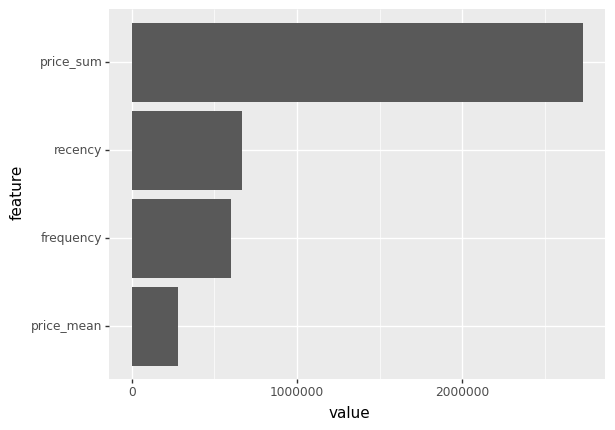

<ggplot: (8738757104809)>

In [116]:
pn.ggplot(pn.aes('feature', 'value'), data = imp_spend_amount_df) + pn.geom_col() + pn.coord_flip() #plot of feature importance.

In [117]:
# Importance | Spend probability model
imp_spend_prob_dict = xgb_clf_model.best_estimator_.get_booster().get_score(importance_type = 'gain')

In [118]:
imp_spend_prob_df = pd.DataFrame(data = {'feature': list(imp_spend_prob_dict.keys()), 
                                   'value': list(imp_spend_prob_dict.values())}).assign(feature = lambda x : cat.cat_reorder(x['feature'], x['value']))

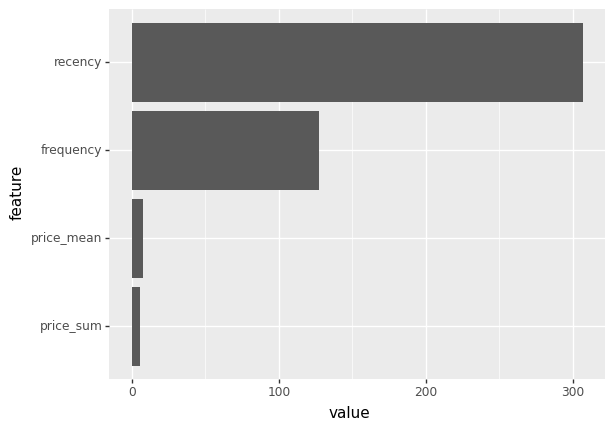

<ggplot: (8738757082953)>

In [119]:
pn.ggplot(pn.aes('feature', 'value'), data = imp_spend_prob_df) + pn.geom_col() + pn.coord_flip() #plot of feature importance.

# CLV Mathematically

In [120]:
# Creating a customer level dataframe
customer_level_data = CDNOW_DATA.groupby("CustomerID").aggregate({"TransactionDate": lambda x: (x.max() - x.min()).days,
                                                              "CustomerID": lambda x: len(x),
                                                   "Price" : lambda x: x.sum()})
customer_level_data.columns = ['num_days', 'num_transactions', 'spent_money']
customer_level_data.head()

,num_days,num_transactions,spent_money
CustomerID,,,
10,0,1,39.31
100,474,3,55.24
1000,0,1,8.99
10000,175,3,77.42
10001,245,2,19.78


### AVG_ORDER_VALUE

In [121]:
#Calculating the average order value for each customer
customer_level_data['avg_order_value']=customer_level_data['spent_money']/customer_level_data['num_transactions']
customer_level_data.head()

,num_days,num_transactions,spent_money,avg_order_value
CustomerID,,,,
10,0,1,39.31,39.310000
100,474,3,55.24,18.413333
1000,0,1,8.99,8.990000
10000,175,3,77.42,25.806667
10001,245,2,19.78,9.890000


### PURCHASE FREQUNECY


In [122]:
purchase_frequency=sum(customer_level_data['num_transactions'])/customer_level_data.shape[0]
purchase_frequency

2.9554923840638128

### REPEAT RATE

In [123]:
# Repeat Rate
repeat_rate=customer_level_data[customer_level_data.num_transactions > 1].shape[0]/customer_level_data.shape[0]
repeat_rate

0.49480249480249483

### CHURN

In [124]:
#Churn Rate
churn_rate=1-repeat_rate
churn_rate

0.5051975051975052

In [125]:
purchase_frequency,repeat_rate,churn_rate

(2.9554923840638128, 0.49480249480249483, 0.5051975051975052)

### PROFIT

In [126]:
# Assuming profit marging to be of 5%
customer_level_data["profit"] = customer_level_data["spent_money"]* 0.05
customer_level_data.head()

,num_days,num_transactions,spent_money,avg_order_value,profit
CustomerID,,,,,
10,0,1,39.31,39.310000,1.9655
100,474,3,55.24,18.413333,2.7620
1000,0,1,8.99,8.990000,0.4495
10000,175,3,77.42,25.806667,3.8710
10001,245,2,19.78,9.890000,0.9890


### CLV

In [127]:
# CLV
customer_level_data['CLV']=(customer_level_data['avg_order_value']*purchase_frequency)/churn_rate

### CLTV

In [128]:
customer_level_data['cust_lifetime_value']=customer_level_data['CLV']*customer_level_data['profit']
customer_level_data.head()

,num_days,num_transactions,spent_money,avg_order_value,profit,CLV,cust_lifetime_value
CustomerID,,,,,,,
10,0,1,39.31,39.310000,1.9655,229.970268,452.006562
100,474,3,55.24,18.413333,2.7620,107.721170,297.525872
1000,0,1,8.99,8.990000,0.4495,52.593048,23.640575
10000,175,3,77.42,25.806667,3.8710,150.973443,584.418198
10001,245,2,19.78,9.890000,0.9890,57.858203,57.221763


In [129]:
cdnow = CDNOW_DATA.copy()

cdnow['month_yr'] = cdnow['TransactionDate'].apply(lambda x: x.strftime('%b-%Y'))
cdnow.head()

,CustomerID,TransactionDate,UnitsSold,Price,month_yr
0,2,1997-01-12,1,12.00,Jan-1997
1,2,1997-01-12,5,77.00,Jan-1997
2,3,1997-01-02,2,20.76,Jan-1997
3,3,1997-03-30,2,20.76,Mar-1997
4,3,1997-04-02,2,19.54,Apr-1997


In [130]:
sale=cdnow.pivot_table(index=['CustomerID'],columns=['month_yr'],values='Price',aggfunc='sum',fill_value=0).reset_index()
sale.head()


month_yr,CustomerID,Apr-1997,Apr-1998,Aug-1997,Dec-1997,Feb-1997,Feb-1998,Jan-1997,Jan-1998,Jul-1997,Jun-1997,Jun-1998,Mar-1997,Mar-1998,May-1997,May-1998,Nov-1997,Oct-1997,Sep-1997
0,10,0.0,0.00,0.0,0.00,0.00,0.0,39.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,100,0.0,28.98,0.0,12.49,0.00,0.0,13.77,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,1000,0.0,0.00,0.0,0.00,0.00,0.0,8.99,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,10000,0.0,0.00,0.0,0.00,14.37,0.0,0.00,0.0,22.54,40.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,10001,0.0,0.00,0.0,0.00,6.79,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12.99,0.0


In [131]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,CustomerID,Apr-1997,Apr-1998,Aug-1997,Dec-1997,Feb-1997,Feb-1998,Jan-1997,Jan-1998,Jul-1997,Jun-1997,Jun-1998,Mar-1997,Mar-1998,May-1997,May-1998,Nov-1997,Oct-1997,Sep-1997,CLV
0,10,0.0,0.00,0.0,0.00,0.00,0.0,39.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,39.31
1,100,0.0,28.98,0.0,12.49,0.00,0.0,13.77,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,55.24
2,1000,0.0,0.00,0.0,0.00,0.00,0.0,8.99,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,8.99
3,10000,0.0,0.00,0.0,0.00,14.37,0.0,0.00,0.0,22.54,40.51,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,77.42
4,10001,0.0,0.00,0.0,0.00,6.79,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,12.99,0.0,19.78


In [132]:
cdnow["TransactionDate"].max()

Timestamp('1998-06-30 00:00:00')

# CLV prediction based on the latest 6 month sales data:

>Predictive modeling on the customer lifetime value instead of the sales expected in next 90 days

In [133]:
# Selecting features as the latest 6 month data

X2=sale[['Jan-1998','Feb-1998', 'Mar-1998','Apr-1998','May-1998','Jun-1998']]
y=sale[['CLV']]

### XGBOOST

In [134]:
xgb = XGBRegressor(objective='reg:squarederror', random_state = 123) #model

In [135]:
# GridSearch with all the hyperparameters
xgb =GridSearchCV(estimator=xgb, param_grid = dict(learning_rate = [0.01, 0.1, 0.3, 0.5]), scoring='neg_mean_absolute_error', refit= True, cv = 5)

In [136]:
xgb.fit(X2, y) # Fitting the data

GridSearchCV(cv=5,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=123),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5]},
             scoring='neg_mean_absolute_error')

In [137]:
xgb.best_score_ # NAE for the best model

-57.961698107716096

In [138]:
xgb.best_params_ # Hyper parameters for the best model

{'learning_rate': 0.1}

In [139]:
predictions_xgb_reg_6model = xgb.predict(X2) # prediction

In [140]:
XGBOOST_6M_REG = pd.DataFrame({"prediction_xgb_6m" : predictions_xgb_reg_6model.tolist()}).merge(X2,left_index=True, right_index=True).merge(sale["CustomerID"],left_index=True, right_index=True)

In [141]:
XGBOOST_6M_REG.to_csv("XGB_reg_6m_prediction.csv") # Prediction to csv.

### Linear Regression

In [142]:
lr = LinearRegression()

In [143]:
parameters = {'fit_intercept':[True,False],  'copy_X':[True, False]} # Hyperparameters
lr_reg_model = GridSearchCV(lr,parameters, cv=5, scoring='neg_mean_absolute_error')
lr_reg_model.fit(X2, y) #fittig the data

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [144]:
lr_reg_model.best_score_ # NAE for the best model

-57.008906956232764

In [145]:
lr_reg_model.best_params_ # Hyperparameters for the best model.

{'copy_X': True, 'fit_intercept': True}

In [146]:
predictions_lr_reg_6model = lr_reg_model.predict(X2).reshape(-1)
predictions_lr_reg_6model

array([ 53.33973479, 117.48789003,  53.33973479, ...,  53.33973479,
        53.33973479,  53.33973479])

In [147]:
# Storing the prediction in a dataframe.
LinearReg_6M_REG = pd.DataFrame({"prediction_lr_6m" : predictions_lr_reg_6model.tolist()}).merge(X2,left_index=True, right_index=True).merge(sale["CustomerID"],left_index=True, right_index=True)

In [148]:
LinearReg_6M_REG.to_csv("lr_reg_6m_prediction.csv")# Prediction to csv.

### Random Forest Regression

In [149]:
rf = RandomForestRegressor() # Model
rf_regressor =GridSearchCV(estimator=rf, param_grid = param_grid, scoring='neg_mean_absolute_error', refit= True, cv = 5) 

In [150]:
rf_regressor.fit(X2, y.values.ravel()) # fitting the data

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 500, 1000]},
             scoring='neg_mean_absolute_error')

In [151]:
rf_regressor.best_score_ # NAE for the best model

-62.0403467161175

In [152]:
predictions_rf_reg_6model = rf_regressor.predict(X2) # Prediction

In [153]:
RFReg_6M_REG = pd.DataFrame({"prediction_rf_6m" : predictions_rf_reg_6model.tolist()}).merge(X2,left_index=True, right_index=True).merge(sale["CustomerID"],left_index=True, right_index=True)

In [154]:
RFReg_6M_REG.to_csv("rf_reg_6m_prediction.csv")# Prediction to csv.

# Lifetimes Library

In [155]:
CDNOW_DATA = CDNOW_DATA[CDNOW_DATA['Price'] > 0]
TRAIN = CDNOW_DATA[CDNOW_DATA["TransactionDate"] < CDNOW_DATA["TransactionDate"].max() - dt.timedelta(days = 30)]
TRAIN.shape

(67467, 4)

In [156]:
TEST =  CDNOW_DATA[CDNOW_DATA["TransactionDate"] >= CDNOW_DATA["TransactionDate"].max() - dt.timedelta(days = 30)]
TEST.shape

(2111, 4)

In [157]:
CDNOW_data_LT = lifetimes.utils.summary_data_from_transaction_data(TRAIN, 'CustomerID', 'TransactionDate', 'Price' )
CDNOW_data_LT.head()

# frequency: total number of repeat purchases
# recency: the difference between the customer's last purchase and his first purchase
# T: the age of the client in the company
# monetary_value: average earnings per purchase

,frequency,recency,T,monetary_value
CustomerID,,,,
10,0.0,0.0,494.0,0.000
100,2.0,474.0,514.0,20.735
1000,0.0,0.0,495.0,0.000
10000,2.0,175.0,478.0,31.525
10001,1.0,245.0,478.0,12.990


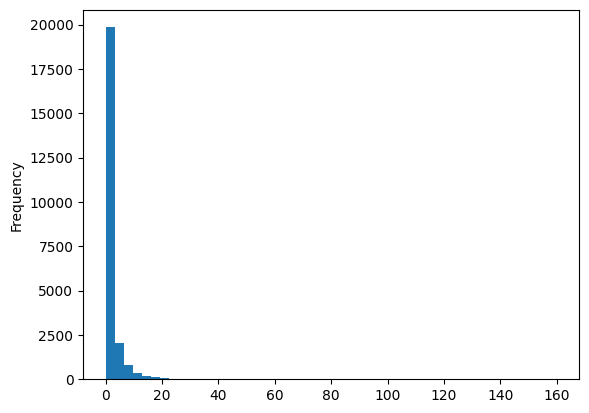

count    23501.000000
mean         1.786647
std          3.963537
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        160.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers that purchased the item only once: 51.42 %


In [158]:
# Create a distribution of frequency to understand the customer frequency level
CDNOW_data_LT['frequency'].plot(kind='hist', bins=50)
plt.show()
print(CDNOW_data_LT['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(CDNOW_data_LT['frequency'] == 0)/float(len(CDNOW_data_LT))*(100),2)
print("Percentage of customers that purchased the item only once:", one_time_buyers ,"%")

In [159]:
# Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(CDNOW_data_LT['frequency'], CDNOW_data_LT['recency'], CDNOW_data_LT['T'])

<lifetimes.BetaGeoFitter: fitted with 23501 subjects, a: 0.49, alpha: 41.74, b: 2.06, r: 0.27>

In [160]:
# Model summary
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.270222,0.003751,0.262870,0.277575
alpha,41.739415,0.964840,39.848329,43.630501
a,0.489876,0.027509,0.435958,0.543793
b,2.055083,0.151340,1.758456,2.351709


In [161]:
# Compute the customer alive probability
CDNOW_data_LT['probability_alive'] = bgf.conditional_probability_alive(CDNOW_data_LT['frequency'], CDNOW_data_LT['recency'], CDNOW_data_LT['T'])
CDNOW_data_LT.head(10)

,frequency,recency,T,monetary_value,probability_alive
CustomerID,,,,,
10,0.0,0.0,494.0,0.000,1.000000
100,2.0,474.0,514.0,20.735,0.840349
1000,0.0,0.0,495.0,0.000,1.000000
10000,2.0,175.0,478.0,31.525,0.461278
10001,1.0,245.0,478.0,12.990,0.663393
10002,0.0,0.0,478.0,0.000,1.000000
10003,0.0,0.0,478.0,0.000,1.000000
10004,0.0,0.0,478.0,0.000,1.000000
10005,0.0,0.0,469.0,0.000,1.000000


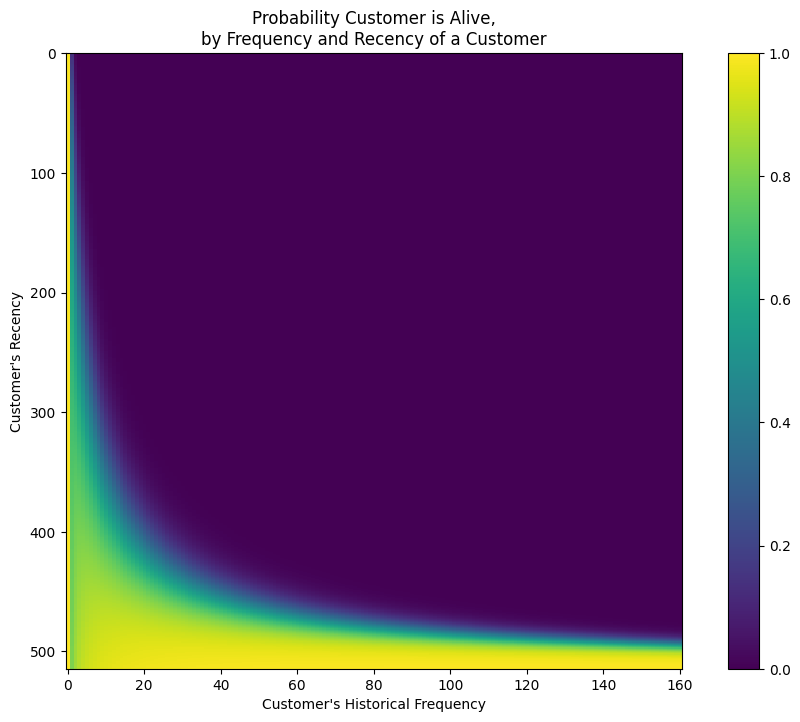

In [162]:
# Visual representation of relationship between recency and frequency
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_probability_alive_matrix

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)
plt.show()

In [163]:
#Predict future transaction for the next 30 days based on historical dataa
t = 30
CDNOW_data_LT['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, CDNOW_data_LT['frequency'], CDNOW_data_LT['recency'], CDNOW_data_LT['T']),2)
CDNOW_data_LT.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,14048,160.0,463.0,465.0,52.730062,0.994300,9.30
1,7592,131.0,483.0,486.0,93.060458,0.992221,7.30
2,22061,111.0,430.0,436.0,33.009640,0.982472,6.76
3,7983,112.0,478.0,481.0,58.564018,0.991799,6.30
4,19597,90.0,444.0,446.0,24.609333,0.992264,5.43
5,3049,75.0,496.0,502.0,50.740533,0.985369,4.04
6,2484,62.0,503.0,504.0,25.641613,0.991366,3.35
7,10079,57.0,463.0,478.0,37.042456,0.956803,3.12
8,4459,57.0,469.0,491.0,31.856316,0.913706,2.91
9,17104,50.0,440.0,454.0,29.721000,0.961075,2.88


In [164]:
# Checking the relationship between frequency and monetary_value
CDNOW_return_customers_summary = CDNOW_data_LT[CDNOW_data_LT['frequency']>0]
print(CDNOW_return_customers_summary.shape)
CDNOW_return_customers_summary.head()

(11416, 6)


,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
CustomerID,,,,,,
100,2.0,474.0,514.0,20.735000,0.840349,0.10
10000,2.0,175.0,478.0,31.525000,0.461278,0.06
10001,1.0,245.0,478.0,12.990000,0.663393,0.05
10009,3.0,262.0,474.0,100.783333,0.594407,0.11
1001,2.0,133.0,510.0,28.335000,0.314353,0.04


In [165]:
# Checking the relationship between frequency and monetary_value
CDNOW_return_customers_summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.069991
monetary_value,0.069991,1.000000


In [166]:
# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(CDNOW_return_customers_summary['frequency'],
       CDNOW_return_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 11416 subjects, p: 4.11, q: 0.96, v: 3.83>

In [167]:
# Summary of the fitted parameters
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,4.109405,0.044198,4.022777,4.196034
q,0.958532,0.011201,0.936577,0.980487
v,3.831848,0.044178,3.745260,3.918436


In [168]:
# Calculating the conditional expected average profit for each customer per transaction
CDNOW_data_LT_vF = CDNOW_data_LT[CDNOW_data_LT['monetary_value'] >0]
CDNOW_data_LT_vF['exp_avg_sales'] = ggf.conditional_expected_average_profit(CDNOW_data_LT['frequency'],
                                       CDNOW_data_LT['monetary_value'])
CDNOW_data_LT_vF.head()

,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales
CustomerID,,,,,,,
100,2.0,474.0,514.0,20.735000,0.840349,0.10,22.765789
10000,2.0,175.0,478.0,31.525000,0.461278,0.06,33.610506
10001,1.0,245.0,478.0,12.990000,0.663393,0.05,16.993327
10009,3.0,262.0,474.0,100.783333,0.594407,0.11,102.405072
1001,2.0,133.0,510.0,28.335000,0.314353,0.04,30.404329


In [169]:
# Checking the expected average value and the actual average value in the data to make sure the values are good
print(f"Expected Average Sales: {CDNOW_data_LT_vF['exp_avg_sales'].mean()}")
print(f"Actual Average Sales: {CDNOW_data_LT_vF['monetary_value'].mean()}")

Expected Average Sales: 38.33174958021603
Actual Average Sales: 35.99568193579705


In [170]:
# Predicting Customer Lifetime Value for the next 30 days
CDNOW_data_LT_vF['predicted_clv'] =      ggf.customer_lifetime_value(bgf,
                                                               CDNOW_data_LT_vF['frequency'],
                                                               CDNOW_data_LT_vF['recency'],
                                                               CDNOW_data_LT_vF['T'],
                                                               CDNOW_data_LT_vF['monetary_value'],
                                                               time=1,     # lifetime in months
                                                               freq='D',   # frequency in which the data is present(T)      
                                                               discount_rate=0.01) # discount rate
CDNOW_data_LT_vF.head()

,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv
CustomerID,,,,,,,,
100,2.0,474.0,514.0,20.735000,0.840349,0.10,22.765789,2.299704
10000,2.0,175.0,478.0,31.525000,0.461278,0.06,33.610506,1.991479
10001,1.0,245.0,478.0,12.990000,0.663393,0.05,16.993327,0.811097
10009,3.0,262.0,474.0,100.783333,0.594407,0.11,102.405072,11.341482
1001,2.0,133.0,510.0,28.335000,0.314353,0.04,30.404329,1.157153


In [171]:
# Manual CLV pridiction
CDNOW_data_LT_vF['manual_predicted_clv'] = CDNOW_data_LT_vF['pred_num_txn'] * CDNOW_data_LT_vF['exp_avg_sales']
CDNOW_data_LT_vF.head()

,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv
CustomerID,,,,,,,,,
100,2.0,474.0,514.0,20.735000,0.840349,0.10,22.765789,2.299704,2.276579
10000,2.0,175.0,478.0,31.525000,0.461278,0.06,33.610506,1.991479,2.016630
10001,1.0,245.0,478.0,12.990000,0.663393,0.05,16.993327,0.811097,0.849666
10009,3.0,262.0,474.0,100.783333,0.594407,0.11,102.405072,11.341482,11.264558
1001,2.0,133.0,510.0,28.335000,0.314353,0.04,30.404329,1.157153,1.216173


### TEST

In [172]:
TEST.head()

,CustomerID,TransactionDate,UnitsSold,Price
37,9,1998-06-08,2,41.98
69,25,1998-06-03,3,24.97
70,25,1998-06-08,2,24.98
194,47,1998-06-06,1,12.99
213,48,1998-06-08,1,9.49


In [173]:
ACTUAL = TEST.groupby("CustomerID")["Price"].sum().reset_index() # Calculating the Sum of Price

In [174]:
ACTUAL.rename(columns ={"Price":"actual_amount_spent_in_next_30_days"}, inplace = True) # renaming the columns

In [175]:
# Actual vs Predicted Dataframe
Pred_vs_Actual = CDNOW_data_LT_vF.merge(ACTUAL, on = "CustomerID", how = "left")
Pred_vs_Actual.fillna(0, inplace = True)

In [176]:
Pred_vs_Actual.head() # looking at the Actual vs Predicted Dataframe

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,actual_amount_spent_in_next_30_days
0,100,2.0,474.0,514.0,20.735000,0.840349,0.10,22.765789,2.299704,2.276579,0.0
1,10000,2.0,175.0,478.0,31.525000,0.461278,0.06,33.610506,1.991479,2.016630,0.0
2,10001,1.0,245.0,478.0,12.990000,0.663393,0.05,16.993327,0.811097,0.849666,0.0
3,10009,3.0,262.0,474.0,100.783333,0.594407,0.11,102.405072,11.341482,11.264558,0.0
4,1001,2.0,133.0,510.0,28.335000,0.314353,0.04,30.404329,1.157153,1.216173,0.0


In [177]:
# difference between actual and predicted
Pred_vs_Actual["difference"] = Pred_vs_Actual["manual_predicted_clv"] - Pred_vs_Actual["actual_amount_spent_in_next_30_days"]

In [178]:
Pred_vs_Actual.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,actual_amount_spent_in_next_30_days,difference
0,100,2.0,474.0,514.0,20.735000,0.840349,0.10,22.765789,2.299704,2.276579,0.0,2.276579
1,10000,2.0,175.0,478.0,31.525000,0.461278,0.06,33.610506,1.991479,2.016630,0.0,2.016630
2,10001,1.0,245.0,478.0,12.990000,0.663393,0.05,16.993327,0.811097,0.849666,0.0,0.849666
3,10009,3.0,262.0,474.0,100.783333,0.594407,0.11,102.405072,11.341482,11.264558,0.0,11.264558
4,1001,2.0,133.0,510.0,28.335000,0.314353,0.04,30.404329,1.157153,1.216173,0.0,1.216173


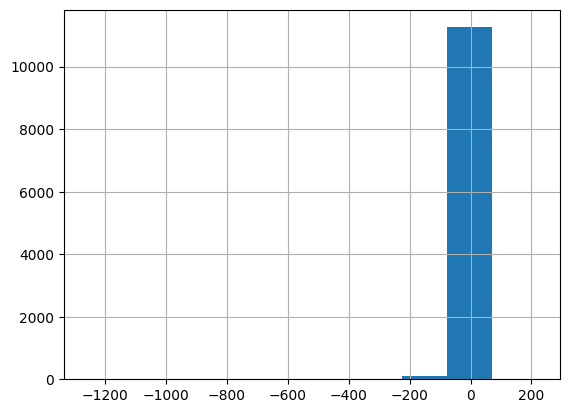

In [179]:
Pred_vs_Actual["difference"].hist()

In [180]:
Pred_vs_Actual["difference"].describe()

count    11416.000000
mean        -0.341102
std         27.547800
min      -1262.237702
25%          0.472827
50%          1.593419
75%          4.734611
max        218.300867
Name: difference, dtype: float64

In [181]:
Pred_vs_Actual.sort_values('actual_amount_spent_in_next_30_days', ascending = False)

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,manual_predicted_clv,actual_amount_spent_in_next_30_days,difference
10151,7592,131.0,483.0,486.0,93.060458,0.992221,7.30,93.096880,673.322354,679.607224,1726.80,-1047.192776
10819,8830,9.0,403.0,482.0,54.796667,0.818460,0.43,55.284414,23.499369,23.772298,1286.01,-1262.237702
114,10197,1.0,380.0,473.0,308.790000,0.765091,0.06,315.808672,17.551818,18.948520,587.63,-568.681480
7725,3176,2.0,455.0,502.0,63.745000,0.835507,0.10,65.993896,6.772911,6.599390,563.13,-556.530610
2147,14048,160.0,463.0,465.0,52.730062,0.994300,9.30,52.757339,485.906899,490.643252,534.73,-44.086748
...,...,...,...,...,...,...,...,...,...,...,...,...
4078,17584,1.0,56.0,453.0,21.740000,0.348411,0.03,25.832524,0.679984,0.774976,0.00,0.774976
4079,17585,7.0,446.0,453.0,22.407143,0.936808,0.41,22.987688,9.281901,9.424952,0.00,9.424952
4080,17589,2.0,71.0,453.0,26.535000,0.178413,0.02,28.595201,0.688097,0.571904,0.00,0.571904
4081,1759,4.0,324.0,507.0,47.847500,0.646013,0.15,48.928897,7.229131,7.339335,0.00,7.339335


In [182]:
# MAE of the Lifetimes.
mean_absolute_error(Pred_vs_Actual["actual_amount_spent_in_next_30_days"], Pred_vs_Actual["manual_predicted_clv"])

9.049336545343836